In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [11]:
# 1. Завантаження та підготовка даних: 
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [12]:
# Розділення на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Масштабування даних (для регуляризації краще працювати з масштабованими даними)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# 2. Побудова базової лінійної регресії
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Прогнозування на навчальних та тестових вибірках
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

In [16]:
# Оцінка моделі
print("Лінійна регресія:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, R²: {r2_score(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}, R²: {r2_score(y_test, y_test_pred)}\n")

Лінійна регресія:
Train MSE: 0.5179331255246699, R²: 0.6125511913966952
Test MSE: 0.5558915986952442, R²: 0.575787706032451


In [17]:
# 4. Запобігання перенавчанню з використанням регуляризації (Ridge та Lasso)
# Введення діапазону значень для параметра регуляризації (alpha)
alphas = np.logspace(-4, 4, 100)

ridge_mse, lasso_mse = [], []
ridge_r2, lasso_r2 = [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge.fit(X_train_scaled, y_train)
    lasso.fit(X_train_scaled, y_train)
    
    ridge_mse.append(mean_squared_error(y_test, ridge.predict(X_test_scaled)))
    lasso_mse.append(mean_squared_error(y_test, lasso.predict(X_test_scaled)))
    
    ridge_r2.append(r2_score(y_test, ridge.predict(X_test_scaled)))
    lasso_r2.append(r2_score(y_test, lasso.predict(X_test_scaled)))

In [19]:
# 4. Оцінка найкращих моделей Ridge та Lasso
best_ridge_alpha = alphas[np.argmin(ridge_mse)]
best_lasso_alpha = alphas[np.argmin(lasso_mse)]

best_ridge = Ridge(alpha=best_ridge_alpha)
best_lasso = Lasso(alpha=best_lasso_alpha)

best_ridge.fit(X_train_scaled, y_train)
best_lasso.fit(X_train_scaled, y_train)

best_ridge_test_pred = best_ridge.predict(X_test_scaled)
best_lasso_test_pred = best_lasso.predict(X_test_scaled)

# Порівняння продуктивності найкращих моделей з базовою моделлю
print(f"Ridge Regression (alpha={best_ridge_alpha}):")
print(f"Train MSE: {mean_squared_error(y_train, best_ridge.predict(X_train_scaled))}, R²: {r2_score(y_train, best_ridge.predict(X_train_scaled))}")
print(f"Test MSE: {mean_squared_error(y_test, best_ridge_test_pred)}, R²: {r2_score(y_test, best_ridge_test_pred)}\n")

print(f"Lasso Regression (alpha={best_lasso_alpha}):")
print(f"Train MSE: {mean_squared_error(y_train, best_lasso.predict(X_train_scaled))}, R²: {r2_score(y_train, best_lasso.predict(X_train_scaled))}")
print(f"Test MSE: {mean_squared_error(y_test, best_lasso_test_pred)}, R²: {r2_score(y_test, best_lasso_test_pred)}\n")

Ridge Regression (alpha=242.01282647943833):
Train MSE: 0.5217329024860942, R²: 0.6097087026966901
Test MSE: 0.5522352794900057, R²: 0.5785779182989654

Lasso Regression (alpha=0.010476157527896652):
Train MSE: 0.5239150414393798, R²: 0.6080763160120174
Test MSE: 0.5482579144800489, R²: 0.5816131272116027


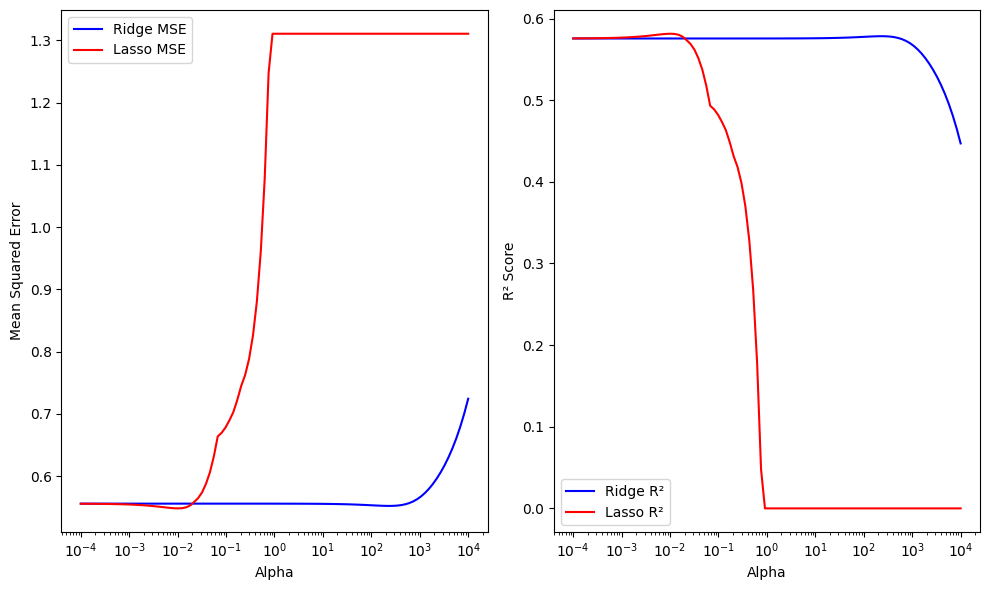

In [20]:
# Візуалізація залежності помилки від параметра регуляризації (альфа)
plt.figure(figsize=(10, 6))

# MSE для Ridge та Lasso
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_mse, label='Ridge MSE', color='blue')
plt.plot(alphas, lasso_mse, label='Lasso MSE', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()

# R² для Ridge та Lasso
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_r2, label='Ridge R²', color='blue')
plt.plot(alphas, lasso_r2, label='Lasso R²', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
X_scaled = scaler.fit_transform(X)

In [23]:
# 2. Пошук оптимальної кількості кластерів методом ліктя
wcss = []  # Within-cluster sum of squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

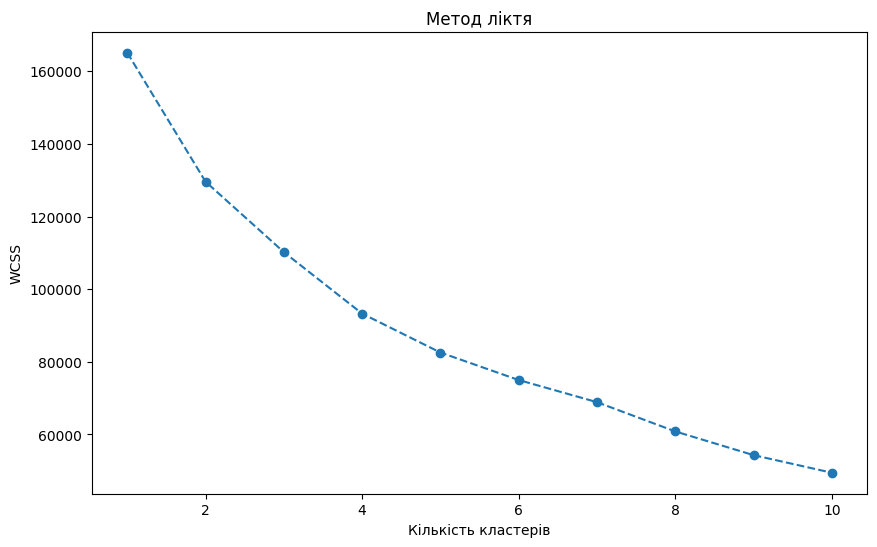

In [24]:
# 3. Використання методу силуетів для вибору кількості кластерів
# Візуалізація методу ліктя

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

In [25]:
# 3. Пошук оптимальної кількості кластерів методом силуетів
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

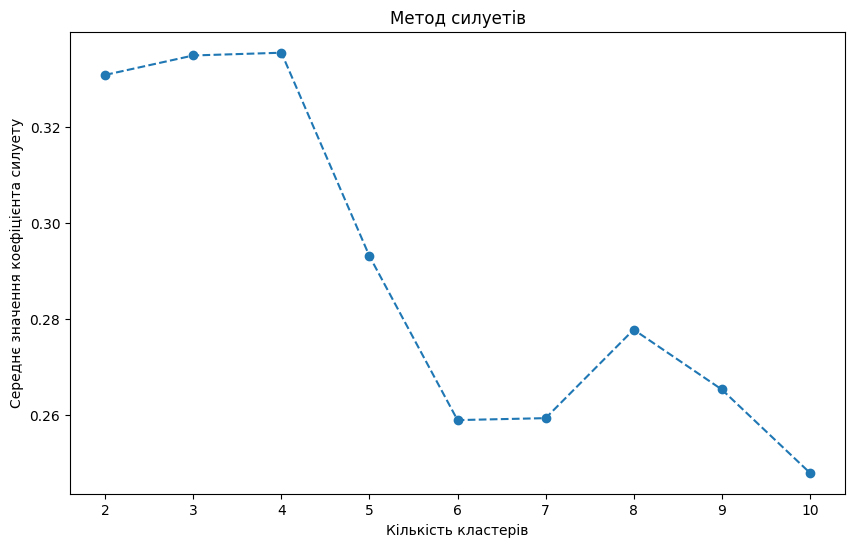

In [26]:
# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення коефіцієнта силуету')
plt.show()


In [27]:
# 4. Виконання кластеризації з оптимальною кількістю кластерів (наприклад, 4 кластери)
optimal_clusters = 4  # Виберіть на основі методу ліктя або силуетів
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

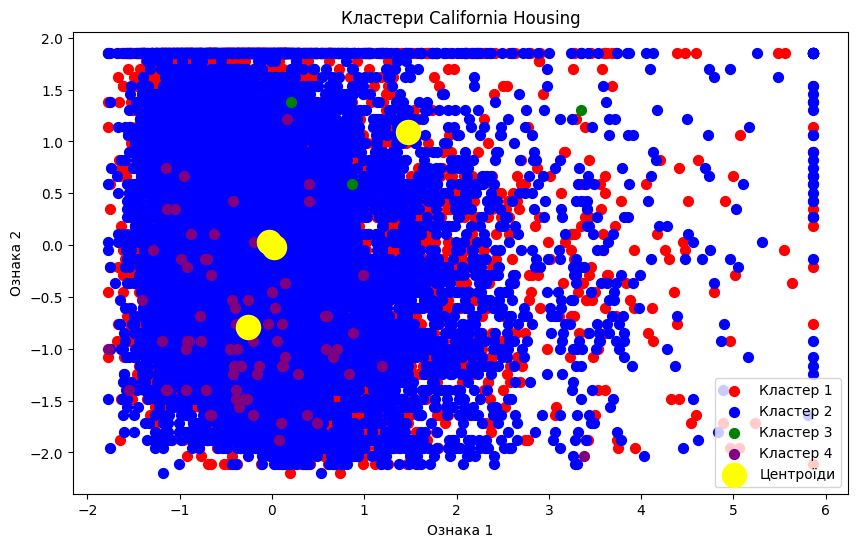

In [28]:
# 5. Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відобразимо перші дві ознаки для простоти візуалізації
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Кластер 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Кластер 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Кластер 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=50, c='purple', label='Кластер 4')

# Візуалізація центроїдів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Центроїди')
plt.title('Кластери California Housing')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.show()

In [29]:
# 6. Висновки
print(f"Оптимальна кількість кластерів за методом ліктя: {optimal_clusters}")
print(f"Оптимальна кількість кластерів за методом силуетів: {np.argmax(silhouette_scores) + 2}")

Оптимальна кількість кластерів за методом ліктя: 4
Оптимальна кількість кластерів за методом силуетів: 4
